In [1]:
# making clusters:
# tabular data
import pandas as pd
import numpy as np
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# sklearn:
# the thing that will do the clustering:
from sklearn.cluster import KMeans
# the thing that will do the scaling:
from sklearn.preprocessing import MinMaxScaler
# the thing that will/would do a train-test split:
from sklearn.model_selection import train_test_split

In [2]:
from pydataset import data

In [3]:
# acquire iris
iris = data('iris')

In [5]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
# basic data prep: change column names
iris.columns = [col.lower().replace('.','_') for col in iris.columns]

In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Proposition:
 - Oops I lost all the labels and tbh I dont really know what an iris is let alone that there are different types
 
 - I work for a botanist and cant let them know that I dont know what the heck Im doing

In [9]:
oops = iris.drop(columns='species')

In [11]:
oops.head()

,sepal_length,sepal_width,petal_length,petal_width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


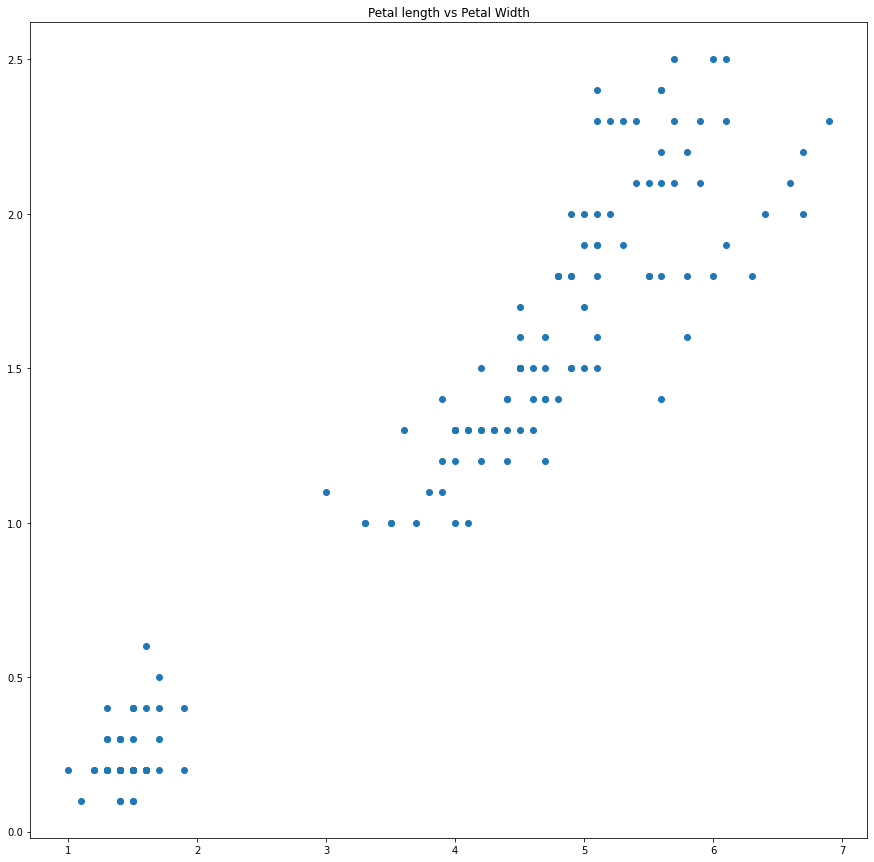

In [14]:
plt.figure(figsize=(15,15))
plt.scatter(oops.petal_length, oops.petal_width)
plt.title('Petal length vs Petal Width')
plt.show()

In [15]:
# create a kmeans model:
# scale the data
# feed the scaled data into kmeans object
# use the kmeans object to predict

In [20]:
# I want to scale on petal length and petal width
feats_to_scale = ['petal_length', 'petal_width']

In [23]:
# I define new column names
# based on the ones I know I'm scaling on
# concatenated with the suffix '_scaled'
cols_scaled = [col + '_scaled' for col in feats_to_scale]

In [24]:
# I assign out new columns
# based on tranformed (scaled) versions of their previous
# selves
oops[cols_scaled] = MinMaxScaler(
).fit_transform(oops[feats_to_scale])

In [25]:
oops.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_length_scaled,petal_width_scaled
1,5.1,3.5,1.4,0.2,0.067797,0.041667
2,4.9,3.0,1.4,0.2,0.067797,0.041667
3,4.7,3.2,1.3,0.2,0.050847,0.041667
4,4.6,3.1,1.5,0.2,0.084746,0.041667
5,5.0,3.6,1.4,0.2,0.067797,0.041667


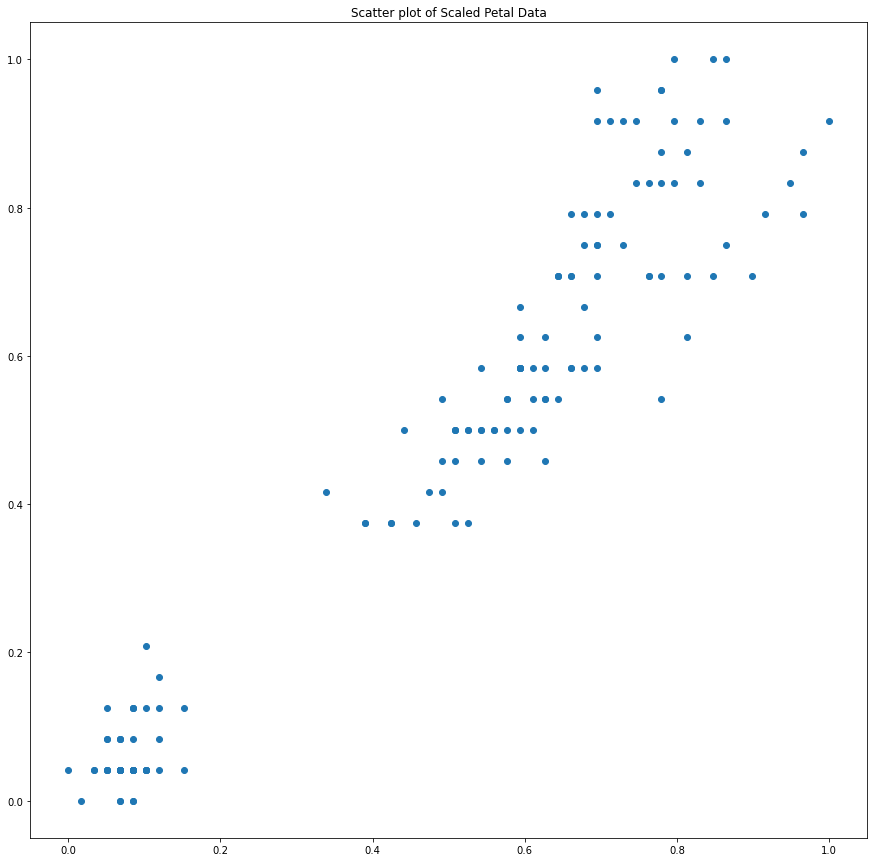

In [26]:
# plot the scaled petal length and width
plt.figure(figsize=(15,15))
plt.scatter(oops.petal_length_scaled, 
            oops.petal_width_scaled)
plt.title('Scatter plot of Scaled Petal Data')
plt.show()

In [28]:
# we preprocessed! huzzah!
# lets make a clustering object from sklearn
# Make a thing! Thats my favorite!
k_means_prototype = KMeans(n_clusters=3)
# fit the thing!!!!
k_means_prototype.fit(oops[cols_scaled])
# use the thing
clusters = k_means_prototype.predict(
    oops[cols_scaled])

In [29]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [30]:
oops['cluster_assigned'] = clusters

In [32]:
# oops.head()

In [33]:
oops.cluster_assigned.value_counts()

2    52
0    50
1    48
Name: cluster_assigned, dtype: int64

In [34]:
oops.cluster_assigned.unique()

array([0, 2, 1], dtype=int32)

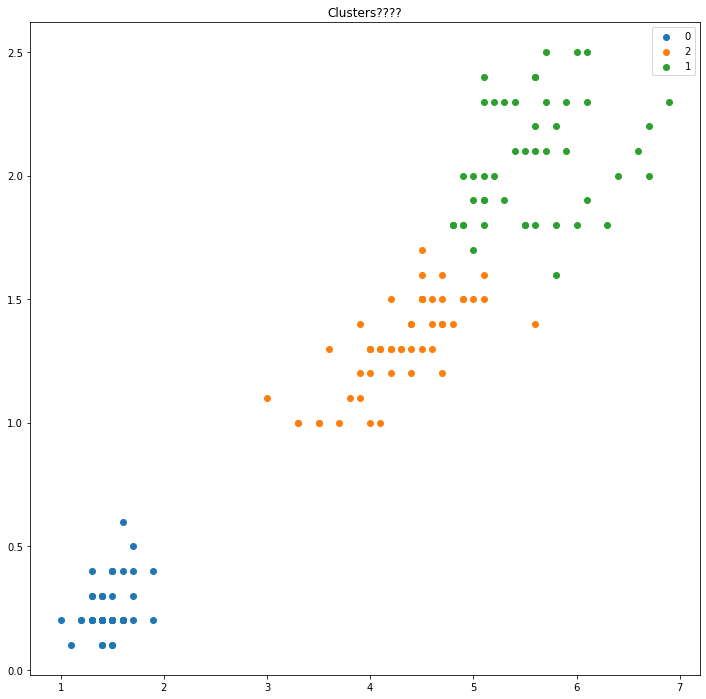

In [45]:
plt.figure(figsize=(12,12))
for cluster in oops.cluster_assigned.unique():
    plt.scatter(oops[oops.cluster_assigned == cluster].petal_length,
             oops[oops.cluster_assigned == cluster].petal_width,
               label=cluster)
plt.title('Clusters????')
plt.legend()
plt.show()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

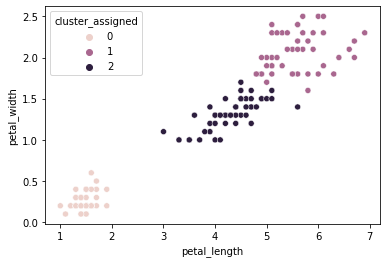

In [40]:
sns.scatterplot(data=oops,
                x='petal_length',
                y='petal_width',
                hue='cluster_assigned')

In [46]:
# let's put the real thing back in oops
# and give ourselves a little assessment
# of how well our clusters matched the species
oops['species'] = iris.species

In [58]:
# In a pandas groupby object,
# i get a return of tuples associated
# with the name of the thing I'm grouping by
# and the dataframe associated with that subset
# like setosa, and the data associated with setosa rows
[print(
    f'Type of first element: {type(thing[0])}, Type of second element: {type(thing[1])}\n'
) for thing in oops.groupby('species')]

Type of first element: <class 'str'>, Type of second element: <class 'pandas.core.frame.DataFrame'>

Type of first element: <class 'str'>, Type of second element: <class 'pandas.core.frame.DataFrame'>

Type of first element: <class 'str'>, Type of second element: <class 'pandas.core.frame.DataFrame'>



[None, None, None]

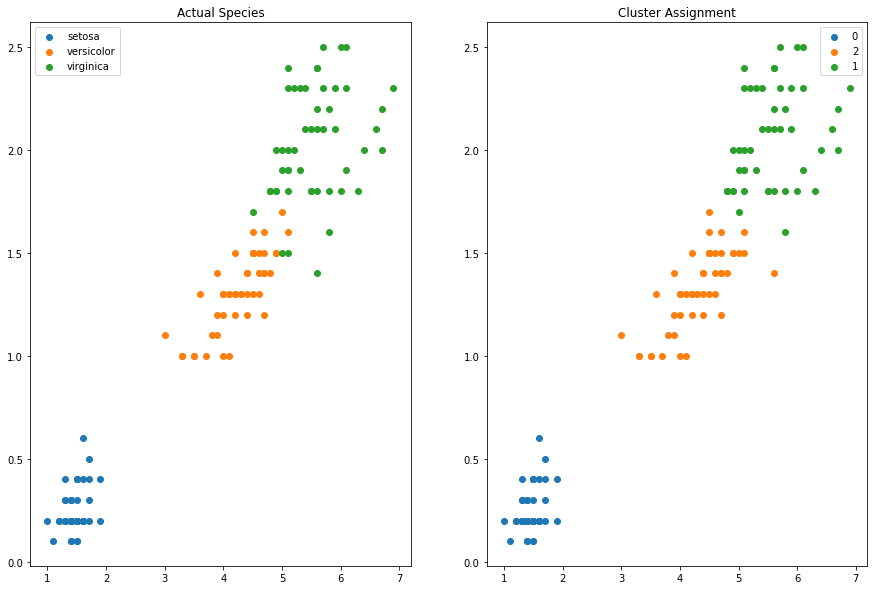

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for species, subset in oops.groupby('species'):
    axs[0].scatter(subset.petal_length,
                   subset.petal_width,
                   label=species)
axs[0].legend()
axs[0].set(title='Actual Species')

for cluster in oops.cluster_assigned.unique():
    axs[1].scatter(oops[oops.cluster_assigned == cluster].petal_length,
             oops[oops.cluster_assigned == cluster].petal_width,
               label=cluster)
axs[1].legend()
axs[1].set(title='Cluster Assignment')

plt.show()

In [66]:
k_means_prototype.inertia_

1.701874688192097

In [77]:
# dictionary comprehensions!!!
# theyre convenient, I promise!
{k: KMeans(k).fit(oops[cols_scaled]
                 ).inertia_ for k in range(2,15)}
# alternatively:
my_kmeans_dict = {}
for k in range(1,15):
    my_kmeans_dict[k] = KMeans(k).fit(oops[cols_scaled]).inertia_

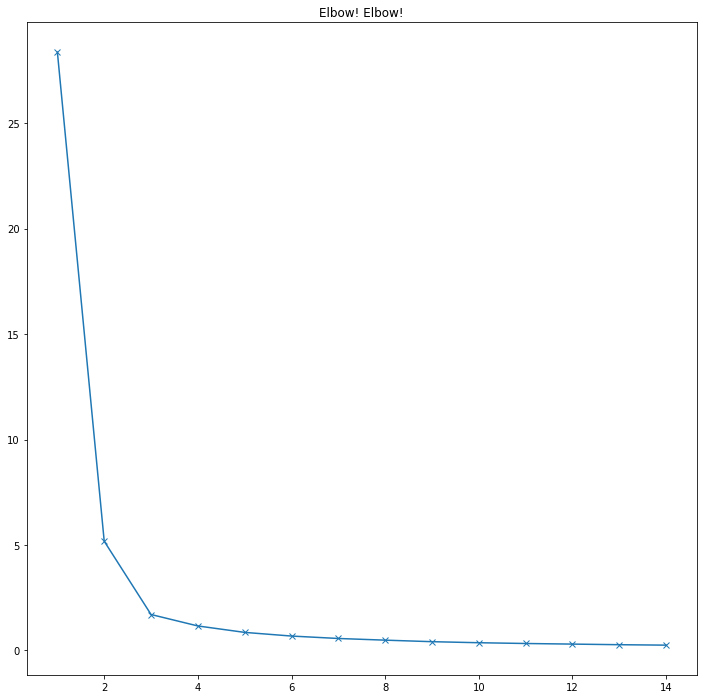

In [78]:
plt.figure(figsize=(12,12))
pd.Series(my_kmeans_dict).plot(marker='x')
plt.title('Elbow! Elbow!')
plt.show()

> It appears that we have a leveling off of inertia beginning after k=3, so it looks like by sheer estimate of inertia that 3 is the best number of clusters to use.  With the hindsight of understanding our data, we know as it stands that 3 clusters is ideal.  However, in real life (and if we didnt know what the label was) we may say that 2 is the best number of clusters.  Its a judgement call and contingent on your specific use-case!!

### Broad-Stroke takeaways:
 - If using clusters for leverage in supervised learning:
 - Ensure that we don't use our target variable for our fit on our Kmeans object
 - We would explore using the cluster to see if it draws reasonable outcomes for our target:
 i.e. Is my logerror mean lower in cluster 2 than cluster 3? (t-test opportunity)
 - we would fit the cluster on our training set and then use it as a preprocessing measure to predict based on the fit centroids to cascade out determinents for our validate and test sets

### If using purely unsupervised:
 - What do you want to know about these groups???
 - What is the utility of your cluster(s)?
 - Use inertia and the elbow method to help determine this on a spacial level, but as with the rest of our knowledge of exploratory data analysis, use your best judgement and critical thinking in symphony with your knowlege that any one tactic (statistically, visually, ML-based) will never paint the entire picture!


## Avoid:
    - p-hacking
    - simpson's paradox